In [1]:
import numpy as np
import pandas as pd

# Define the distance matrix
data = {'A': [0, 4, 5, 10],
        'B': [4, 0, 7, 12],
        'C': [5, 7, 0, 9],
        'D': [10, 12, 9, 0]}

# Convert to a DataFrame
df = pd.DataFrame(data, index=['A', 'B', 'C', 'D'])
print("Distance Matrix:")
print(df)


Distance Matrix:
    A   B  C   D
A   0   4  5  10
B   4   0  7  12
C   5   7  0   9
D  10  12  9   0


In [4]:
dm = np.load('dm-v3.npy')
for i in range(len(dm)):
    for j in range(i+1,len(dm)):
        dm[i][j] = dm[j][i]

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.         ... 0.         0.         0.        ]
 ...
 [1.         1.         1.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.92       0.         0.        ]
 [1.         1.         1.         ... 0.95652174 0.95454545 0.        ]]
[[0.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.         1.         ... 1.         1.         1.        ]
 [1.         1.         0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         0.92       0.95652174]
 [1.         1.         1.         ... 0.92       0.         0.95454545]
 [1.         1.         1.         ... 0.95652174 0.95454545 0.        ]]


In [5]:
sufix = '-v3'
RAW_PATH = '../examples/logs/phylo%s/DiseasePhyloReports.tsv'%sufix
raw_data = pd.read_csv(RAW_PATH, sep = "\t|,", engine='python')
infectious_data = raw_data[raw_data['diseaseStatus'] == 'Infectious'].reset_index()
name = []
for seq in infectious_data['diseaseSeq']:
    name.append(seq.split('.')[-1])

In [6]:
df = pd.DataFrame(data = dm, index=name, columns=name)
df

3-1  683-1  1581-1  2279-1    3148-1  189-1    4858-1  801-1  4945-1  \
3-1     0.0    1.0     1.0     1.0  1.000000    0.5  1.000000    1.0     1.0   
683-1   1.0    0.0     1.0     1.0  1.000000    1.0  1.000000    0.5     1.0   
1581-1  1.0    1.0     0.0     1.0  1.000000    1.0  1.000000    1.0     0.5   
2279-1  1.0    1.0     1.0     0.0  1.000000    1.0  1.000000    1.0     1.0   
3148-1  1.0    1.0     1.0     1.0  0.000000    1.0  0.500000    1.0     1.0   
...     ...    ...     ...     ...       ...    ...       ...    ...     ...   
1716-1  1.0    1.0     1.0     1.0  0.916667    1.0  0.923077    1.0     1.0   
1626-1  1.0    1.0     1.0     1.0  0.928571    1.0  0.933333    1.0     1.0   
2265-1  1.0    1.0     1.0     1.0  0.928571    1.0  0.933333    1.0     1.0   
513-1   1.0    1.0     1.0     1.0  0.923077    1.0  0.928571    1.0     1.0   
2206-1  1.0    1.0     1.0     1.0  0.900000    1.0  0.909091    1.0     1.0   

          4437-1  ...    3311-2    1587-1    3045-1    1676-1     912-1  \
3-1     1.000000  ...  1.000000  1.000000  1.000000  1.000000  1.000000   
683-1   1.000000  ...  1.000000  1.000000  1.000000  1.000000  1.000000   
1581-1  1.000000  ...  1.000000  1.000000  1.000000  1.000000  1.000000   
2279-1  1.000000  ...  1.000000  1.000000  1.000000  1.000000  1.000000   
3148-1  0.500000  ...  0.909091  0.923077  0.923077  0.923077  0.888889   
...          ...  ...       ...       ...       ...       ...       ...   
1716-1  0.923077  ...  0.954545  0.684211  0.913043  0.958333  0.950000   
1626-1  0.933333  ...  0.958333  0.071429  0.920000  0.961538  0.954545   
2265-1  0.933333  ...  0.958333  0.920000  0.071429  0.961538  0.954545   
513-1   0.928571  ...  0.956522  0.700000  0.916667  0.960000  0.952381   
2206-1  0.909091  ...  0.950000  0.954545  0.954545  0.954545  0.100000   

          1716-1    1626-1    2265-1     513-1    2206-1  
3-1     1.000000  1.000000  1.000000  1.000000  1.000000  
683-1   1.000000  1.000000  1.000000  1.000000  1.000000  
1581-1  1.000000  1.000000  1.000000  1.000000  1.000000  
2279-1  1.000000  1.000000  1.000000  1.000000  1.000000  
3148-1  0.916667  0.928571  0.928571  0.923077  0.900000  
...          ...       ...       ...       ...       ...  
1716-1  0.000000  0.700000  0.916667  0.076923  0.952381  
1626-1  0.700000  0.000000  0.923077  0.714286  0.956522  
2265-1  0.916667  0.923077  0.000000  0.920000  0.956522  
513-1   0.076923  0.714286  0.920000  0.000000  0.954545  
2206-1  0.952381  0.956522  0.956522  0.954545  0.000000  

[4446 rows x 4446 columns]

In [38]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Function to perform neighbor-joining
def neighbor_joining(df):
    # Convert the DataFrame to a numpy matrix
    dist_matrix = df.to_numpy()
    taxa = list(df.index)

    while len(taxa) > 2:
        n = len(taxa)
        print(n)
        Q_matrix = np.zeros((n, n))
        
        # Compute the Q matrix
        sumi = [sum(dist_matrix[i]) for i in range(n)]
        
        for i in range(n):
            for j in range(n):
                if i != j:
                    Q_matrix[i][j] = (n - 2) * dist_matrix[i][j] - sumi[i] - sumi[j]
            if i % 1000 == 0:
                print('i:',i)
        
        # Find the pair with the smallest Q value
        min_i, min_j = np.unravel_index(np.argmin(Q_matrix), Q_matrix.shape)
        
        # Compute the distance to the new node
        new_dist = (dist_matrix[min_i][min_j] + 
                    (sumi[min_i] - sumi[min_j]) / (n - 2)) / 2
        
        # Update the distance matrix
        new_row = [(dist_matrix[min_i][k] + dist_matrix[min_j][k] - dist_matrix[min_i][min_j]) / 2 for k in range(n) if k != min_i and k != min_j]
        new_dist_matrix = np.delete(dist_matrix, [min_i, min_j], axis=0)
        new_dist_matrix = np.delete(new_dist_matrix, [min_i, min_j], axis=1)
        new_dist_matrix = np.vstack((new_dist_matrix, new_row))
        new_row.append(0)
        new_dist_matrix = np.column_stack((new_dist_matrix, new_row))
        
        # Update the taxa list
        new_taxa = taxa[:]
        new_taxa.remove(taxa[min_i])
        new_taxa.remove(taxa[min_j])
        new_taxa.append(taxa[min_i] + taxa[min_j])
        
        # Update the distance matrix and taxa list
        dist_matrix = new_dist_matrix
        taxa = new_taxa
    
    # Create the final linkage matrix for dendrogram plotting
    Z = linkage(squareform(df.to_numpy()), method='average')
    return Z



In [ ]:
# Perform neighbor-joining and plot the tree
Z = neighbor_joining(df)
np.save("nj-v3.npy",Z)

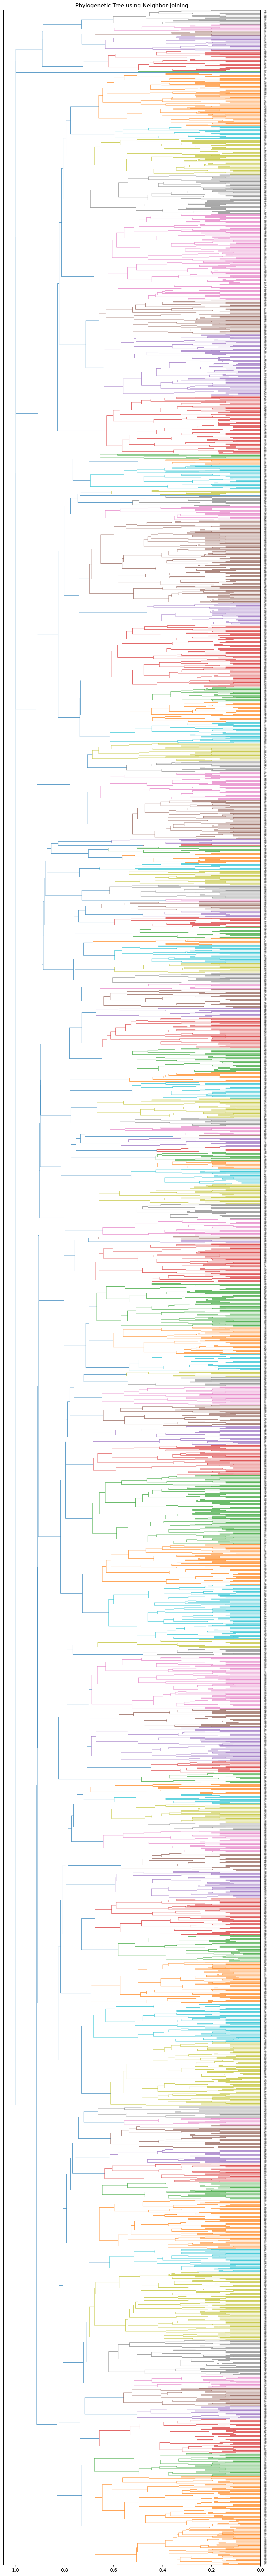

In [19]:
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 0.5
plt.figure(figsize=(10, 100))
pden = dendrogram(Z, labels=df.index, leaf_font_size=2, orientation='left')
plt.title("Phylogenetic Tree using Neighbor-Joining")
plt.savefig("phylo-v3.pdf", format="pdf",bbox_inches="tight")
plt.show()

In [29]:
def jaccards(seq1,seq2):
    seq1 = set(seq1.split('.'))
    seq2 = set(seq2.split('.'))
    
    return len(seq1 & seq2)/len(seq1 | seq2)
za
def disFunc(seq1, seq2, r = 0, timesep = 0):
    # The closer the lower
    addons = timesep/(60*24*288)
    
    return addons * r + (1-jaccards(seq1,seq2)) * (1-r)
    

In [33]:
distance = []
N = len(infectious_data)
for i in range(N):
    tmp = []
    seq1 = infectious_data.iloc[i]['diseaseSeq']
    for j in range(0,i+1):
        if j == i:
            tmp.append(0)
        else:
            seq2 = infectious_data.iloc[j]['diseaseSeq']
            timesep = abs(infectious_data.iloc[j]['step'] - infectious_data.iloc[i]['step'])
            tmp.append(disFunc(seq1,seq2, 0.2, timesep))
    print(len(tmp))
    distance.append(tmp)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


In [34]:
samelength = []
maxlen = len(distance[-1])
for d in distance:
    samelength.append(d + [0] * (maxlen-len(d)))
dm = np.array(samelength)
for i in range(len(dm)):
    for j in range(i+1,len(dm)):
        dm[i][j] = dm[j][i]
np.save("dm%s-time.npy"%sufix,dm)

In [35]:
dm

array([[0.        , 0.8       , 0.8       , ..., 0.80963831, 0.80972126,
        0.80995611],
       [0.8       , 0.        , 0.8       , ..., 0.80963831, 0.80972126,
        0.80995611],
       [0.8       , 0.8       , 0.        , ..., 0.80963831, 0.80972126,
        0.80995611],
       ...,
       [0.80963831, 0.80963831, 0.80963831, ..., 0.        , 0.73608295,
        0.7655352 ],
       [0.80972126, 0.80972126, 0.80972126, ..., 0.73608295, 0.        ,
        0.76387122],
       [0.80995611, 0.80995611, 0.80995611, ..., 0.7655352 , 0.76387122,
        0.        ]])

In [37]:
df2 = pd.DataFrame(data = dm, index=name, columns=name)
df2

3-1     683-1    1581-1    2279-1    3148-1     189-1    4858-1  \
3-1     0.000000  0.800000  0.800000  0.800000  0.800000  0.400508  0.800557   
683-1   0.800000  0.000000  0.800000  0.800000  0.800000  0.800508  0.800557   
1581-1  0.800000  0.800000  0.000000  0.800000  0.800000  0.800508  0.800557   
2279-1  0.800000  0.800000  0.800000  0.000000  0.800000  0.800508  0.800557   
3148-1  0.800000  0.800000  0.800000  0.800000  0.000000  0.800508  0.400557   
...          ...       ...       ...       ...       ...       ...       ...   
1716-1  0.808901  0.808901  0.808901  0.808901  0.742234  0.808393  0.746805   
1626-1  0.809047  0.809047  0.809047  0.809047  0.751904  0.808539  0.755157   
2265-1  0.809638  0.809638  0.809638  0.809638  0.752495  0.809130  0.755748   
513-1   0.809721  0.809721  0.809721  0.809721  0.748183  0.809213  0.752021   
2206-1  0.809956  0.809956  0.809956  0.809956  0.729956  0.809448  0.736672   

           801-1    4945-1    4437-1  ...    3311-2    1587-1    3045-1  \
3-1     0.800591  0.800592  0.800635  ...  0.808453  0.808471  0.808489   
683-1   0.400591  0.800592  0.800635  ...  0.808453  0.808471  0.808489   
1581-1  0.800591  0.400592  0.800635  ...  0.808453  0.808471  0.808489   
2279-1  0.800591  0.800592  0.800635  ...  0.808453  0.808471  0.808489   
3148-1  0.800591  0.800592  0.400635  ...  0.735726  0.746933  0.746950   
...          ...       ...       ...  ...       ...       ...       ...   
1716-1  0.808310  0.808309  0.746727  ...  0.764084  0.547798  0.730847   
1626-1  0.808456  0.808455  0.755079  ...  0.767261  0.057719  0.736558   
2265-1  0.809047  0.809046  0.755670  ...  0.767852  0.737167  0.058293   
513-1   0.809130  0.809129  0.751943  ...  0.766486  0.561250  0.734566   
2206-1  0.809365  0.809364  0.736594  ...  0.761503  0.765121  0.765104   

          1676-1     912-1    1716-1    1626-1    2265-1     513-1    2206-1  
3-1     0.808511  0.808742  0.808901  0.809047  0.809638  0.809721  0.809956  
683-1   0.808511  0.808742  0.808901  0.809047  0.809638  0.809721  0.809956  
1581-1  0.808511  0.808742  0.808901  0.809047  0.809638  0.809721  0.809956  
2279-1  0.808511  0.808742  0.808901  0.809047  0.809638  0.809721  0.809956  
3148-1  0.746973  0.719853  0.742234  0.751904  0.752495  0.748183  0.729956  
...          ...       ...       ...       ...       ...       ...       ...  
1716-1  0.767056  0.760159  0.000000  0.560146  0.734071  0.062359  0.762960  
1626-1  0.769767  0.763941  0.560146  0.000000  0.739053  0.572103  0.766126  
2265-1  0.770358  0.764532  0.734071  0.739053  0.000000  0.736083  0.765535  
513-1   0.769210  0.762884  0.062359  0.572103  0.736083  0.000000  0.763871  
2206-1  0.765081  0.081214  0.762960  0.766126  0.765535  0.763871  0.000000  

[4446 rows x 4446 columns]

In [39]:
Z = neighbor_joining(df2)
np.save("nj-v3-time.npy",Z)

4446
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4445
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4444
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4443
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4442
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4441
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4440
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4439
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4438
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4437
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4436
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4435
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4434
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4433
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4432
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4431
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4430
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4429
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4428
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4427
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4426
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4425
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4424
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4423
i: 0
i: 1000
i: 2000
i: 3000


i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4250
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4249
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4248
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4247
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4246
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4245
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4244
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4243
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4242
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4241
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4240
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4239
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4238
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4237
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4236
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4235
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4234
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4233
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4232
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4231
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4230
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4229
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4228
i: 0
i: 1000
i: 2000
i: 3000
i: 40

i: 1000
i: 2000
i: 3000
i: 4000
4055
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4054
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4053
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4052
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4051
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4050
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4049
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4048
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4047
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4046
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4045
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4044
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4043
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4042
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4041
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4040
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4039
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4038
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4037
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4036
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4035
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4034
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
4033
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
40

i: 0
i: 1000
i: 2000
i: 3000
3827
i: 0
i: 1000
i: 2000
i: 3000
3826
i: 0
i: 1000
i: 2000
i: 3000
3825
i: 0
i: 1000
i: 2000
i: 3000
3824
i: 0
i: 1000
i: 2000
i: 3000
3823
i: 0
i: 1000
i: 2000
i: 3000
3822
i: 0
i: 1000
i: 2000
i: 3000
3821
i: 0
i: 1000
i: 2000
i: 3000
3820
i: 0
i: 1000
i: 2000
i: 3000
3819
i: 0
i: 1000
i: 2000
i: 3000
3818
i: 0
i: 1000
i: 2000
i: 3000
3817
i: 0
i: 1000
i: 2000
i: 3000
3816
i: 0
i: 1000
i: 2000
i: 3000
3815
i: 0
i: 1000
i: 2000
i: 3000
3814
i: 0
i: 1000
i: 2000
i: 3000
3813
i: 0
i: 1000
i: 2000
i: 3000
3812
i: 0
i: 1000
i: 2000
i: 3000
3811
i: 0
i: 1000
i: 2000
i: 3000
3810
i: 0
i: 1000
i: 2000
i: 3000
3809
i: 0
i: 1000
i: 2000
i: 3000
3808
i: 0
i: 1000
i: 2000
i: 3000
3807
i: 0
i: 1000
i: 2000
i: 3000
3806
i: 0
i: 1000
i: 2000
i: 3000
3805
i: 0
i: 1000
i: 2000
i: 3000
3804
i: 0
i: 1000
i: 2000
i: 3000
3803
i: 0
i: 1000
i: 2000
i: 3000
3802
i: 0
i: 1000
i: 2000
i: 3000
3801
i: 0
i: 1000
i: 2000
i: 3000
3800
i: 0
i: 1000
i: 2000
i: 3000
3799
i: 0
i: 1000
i

i: 0
i: 1000
i: 2000
i: 3000
3586
i: 0
i: 1000
i: 2000
i: 3000
3585
i: 0
i: 1000
i: 2000
i: 3000
3584
i: 0
i: 1000
i: 2000
i: 3000
3583
i: 0
i: 1000
i: 2000
i: 3000
3582
i: 0
i: 1000
i: 2000
i: 3000
3581
i: 0
i: 1000
i: 2000
i: 3000
3580
i: 0
i: 1000
i: 2000
i: 3000
3579
i: 0
i: 1000
i: 2000
i: 3000
3578
i: 0
i: 1000
i: 2000
i: 3000
3577
i: 0
i: 1000
i: 2000
i: 3000
3576
i: 0
i: 1000
i: 2000
i: 3000
3575
i: 0
i: 1000
i: 2000
i: 3000
3574
i: 0
i: 1000
i: 2000
i: 3000
3573
i: 0
i: 1000
i: 2000
i: 3000
3572
i: 0
i: 1000
i: 2000
i: 3000
3571
i: 0
i: 1000
i: 2000
i: 3000
3570
i: 0
i: 1000
i: 2000
i: 3000
3569
i: 0
i: 1000
i: 2000
i: 3000
3568
i: 0
i: 1000
i: 2000
i: 3000
3567
i: 0
i: 1000
i: 2000
i: 3000
3566
i: 0
i: 1000
i: 2000
i: 3000
3565
i: 0
i: 1000
i: 2000
i: 3000
3564
i: 0
i: 1000
i: 2000
i: 3000
3563
i: 0
i: 1000
i: 2000
i: 3000
3562
i: 0
i: 1000
i: 2000
i: 3000
3561
i: 0
i: 1000
i: 2000
i: 3000
3560
i: 0
i: 1000
i: 2000
i: 3000
3559
i: 0
i: 1000
i: 2000
i: 3000
3558
i: 0
i: 1000
i

i: 0
i: 1000
i: 2000
i: 3000
3345
i: 0
i: 1000
i: 2000
i: 3000
3344
i: 0
i: 1000
i: 2000
i: 3000
3343
i: 0
i: 1000
i: 2000
i: 3000
3342
i: 0
i: 1000
i: 2000
i: 3000
3341
i: 0
i: 1000
i: 2000
i: 3000
3340
i: 0
i: 1000
i: 2000
i: 3000
3339
i: 0
i: 1000
i: 2000
i: 3000
3338
i: 0
i: 1000
i: 2000
i: 3000
3337
i: 0
i: 1000
i: 2000
i: 3000
3336
i: 0
i: 1000
i: 2000
i: 3000
3335
i: 0
i: 1000
i: 2000
i: 3000
3334
i: 0
i: 1000
i: 2000
i: 3000
3333
i: 0
i: 1000
i: 2000
i: 3000
3332
i: 0
i: 1000
i: 2000
i: 3000
3331
i: 0
i: 1000
i: 2000
i: 3000
3330
i: 0
i: 1000
i: 2000
i: 3000
3329
i: 0
i: 1000
i: 2000
i: 3000
3328
i: 0
i: 1000
i: 2000
i: 3000
3327
i: 0
i: 1000
i: 2000
i: 3000
3326
i: 0
i: 1000
i: 2000
i: 3000
3325
i: 0
i: 1000
i: 2000
i: 3000
3324
i: 0
i: 1000
i: 2000
i: 3000
3323
i: 0
i: 1000
i: 2000
i: 3000
3322
i: 0
i: 1000
i: 2000
i: 3000
3321
i: 0
i: 1000
i: 2000
i: 3000
3320
i: 0
i: 1000
i: 2000
i: 3000
3319
i: 0
i: 1000
i: 2000
i: 3000
3318
i: 0
i: 1000
i: 2000
i: 3000
3317
i: 0
i: 1000
i

i: 0
i: 1000
i: 2000
i: 3000
3104
i: 0
i: 1000
i: 2000
i: 3000
3103
i: 0
i: 1000
i: 2000
i: 3000
3102
i: 0
i: 1000
i: 2000
i: 3000
3101
i: 0
i: 1000
i: 2000
i: 3000
3100
i: 0
i: 1000
i: 2000
i: 3000
3099
i: 0
i: 1000
i: 2000
i: 3000
3098
i: 0
i: 1000
i: 2000
i: 3000
3097
i: 0
i: 1000
i: 2000
i: 3000
3096
i: 0
i: 1000
i: 2000
i: 3000
3095
i: 0
i: 1000
i: 2000
i: 3000
3094
i: 0
i: 1000
i: 2000
i: 3000
3093
i: 0
i: 1000
i: 2000
i: 3000
3092
i: 0
i: 1000
i: 2000
i: 3000
3091
i: 0
i: 1000
i: 2000
i: 3000
3090
i: 0
i: 1000
i: 2000
i: 3000
3089
i: 0
i: 1000
i: 2000
i: 3000
3088
i: 0
i: 1000
i: 2000
i: 3000
3087
i: 0
i: 1000
i: 2000
i: 3000
3086
i: 0
i: 1000
i: 2000
i: 3000
3085
i: 0
i: 1000
i: 2000
i: 3000
3084
i: 0
i: 1000
i: 2000
i: 3000
3083
i: 0
i: 1000
i: 2000
i: 3000
3082
i: 0
i: 1000
i: 2000
i: 3000
3081
i: 0
i: 1000
i: 2000
i: 3000
3080
i: 0
i: 1000
i: 2000
i: 3000
3079
i: 0
i: 1000
i: 2000
i: 3000
3078
i: 0
i: 1000
i: 2000
i: 3000
3077
i: 0
i: 1000
i: 2000
i: 3000
3076
i: 0
i: 1000
i

2822
i: 0
i: 1000
i: 2000
2821
i: 0
i: 1000
i: 2000
2820
i: 0
i: 1000
i: 2000
2819
i: 0
i: 1000
i: 2000
2818
i: 0
i: 1000
i: 2000
2817
i: 0
i: 1000
i: 2000
2816
i: 0
i: 1000
i: 2000
2815
i: 0
i: 1000
i: 2000
2814
i: 0
i: 1000
i: 2000
2813
i: 0
i: 1000
i: 2000
2812
i: 0
i: 1000
i: 2000
2811
i: 0
i: 1000
i: 2000
2810
i: 0
i: 1000
i: 2000
2809
i: 0
i: 1000
i: 2000
2808
i: 0
i: 1000
i: 2000
2807
i: 0
i: 1000
i: 2000
2806
i: 0
i: 1000
i: 2000
2805
i: 0
i: 1000
i: 2000
2804
i: 0
i: 1000
i: 2000
2803
i: 0
i: 1000
i: 2000
2802
i: 0
i: 1000
i: 2000
2801
i: 0
i: 1000
i: 2000
2800
i: 0
i: 1000
i: 2000
2799
i: 0
i: 1000
i: 2000
2798
i: 0
i: 1000
i: 2000
2797
i: 0
i: 1000
i: 2000
2796
i: 0
i: 1000
i: 2000
2795
i: 0
i: 1000
i: 2000
2794
i: 0
i: 1000
i: 2000
2793
i: 0
i: 1000
i: 2000
2792
i: 0
i: 1000
i: 2000
2791
i: 0
i: 1000
i: 2000
2790
i: 0
i: 1000
i: 2000
2789
i: 0
i: 1000
i: 2000
2788
i: 0
i: 1000
i: 2000
2787
i: 0
i: 1000
i: 2000
2786
i: 0
i: 1000
i: 2000
2785
i: 0
i: 1000
i: 2000
2784
i: 0
i:

i: 0
i: 1000
i: 2000
2506
i: 0
i: 1000
i: 2000
2505
i: 0
i: 1000
i: 2000
2504
i: 0
i: 1000
i: 2000
2503
i: 0
i: 1000
i: 2000
2502
i: 0
i: 1000
i: 2000
2501
i: 0
i: 1000
i: 2000
2500
i: 0
i: 1000
i: 2000
2499
i: 0
i: 1000
i: 2000
2498
i: 0
i: 1000
i: 2000
2497
i: 0
i: 1000
i: 2000
2496
i: 0
i: 1000
i: 2000
2495
i: 0
i: 1000
i: 2000
2494
i: 0
i: 1000
i: 2000
2493
i: 0
i: 1000
i: 2000
2492
i: 0
i: 1000
i: 2000
2491
i: 0
i: 1000
i: 2000
2490
i: 0
i: 1000
i: 2000
2489
i: 0
i: 1000
i: 2000
2488
i: 0
i: 1000
i: 2000
2487
i: 0
i: 1000
i: 2000
2486
i: 0
i: 1000
i: 2000
2485
i: 0
i: 1000
i: 2000
2484
i: 0
i: 1000
i: 2000
2483
i: 0
i: 1000
i: 2000
2482
i: 0
i: 1000
i: 2000
2481
i: 0
i: 1000
i: 2000
2480
i: 0
i: 1000
i: 2000
2479
i: 0
i: 1000
i: 2000
2478
i: 0
i: 1000
i: 2000
2477
i: 0
i: 1000
i: 2000
2476
i: 0
i: 1000
i: 2000
2475
i: 0
i: 1000
i: 2000
2474
i: 0
i: 1000
i: 2000
2473
i: 0
i: 1000
i: 2000
2472
i: 0
i: 1000
i: 2000
2471
i: 0
i: 1000
i: 2000
2470
i: 0
i: 1000
i: 2000
2469
i: 0
i: 1000

i: 1000
i: 2000
2191
i: 0
i: 1000
i: 2000
2190
i: 0
i: 1000
i: 2000
2189
i: 0
i: 1000
i: 2000
2188
i: 0
i: 1000
i: 2000
2187
i: 0
i: 1000
i: 2000
2186
i: 0
i: 1000
i: 2000
2185
i: 0
i: 1000
i: 2000
2184
i: 0
i: 1000
i: 2000
2183
i: 0
i: 1000
i: 2000
2182
i: 0
i: 1000
i: 2000
2181
i: 0
i: 1000
i: 2000
2180
i: 0
i: 1000
i: 2000
2179
i: 0
i: 1000
i: 2000
2178
i: 0
i: 1000
i: 2000
2177
i: 0
i: 1000
i: 2000
2176
i: 0
i: 1000
i: 2000
2175
i: 0
i: 1000
i: 2000
2174
i: 0
i: 1000
i: 2000
2173
i: 0
i: 1000
i: 2000
2172
i: 0
i: 1000
i: 2000
2171
i: 0
i: 1000
i: 2000
2170
i: 0
i: 1000
i: 2000
2169
i: 0
i: 1000
i: 2000
2168
i: 0
i: 1000
i: 2000
2167
i: 0
i: 1000
i: 2000
2166
i: 0
i: 1000
i: 2000
2165
i: 0
i: 1000
i: 2000
2164
i: 0
i: 1000
i: 2000
2163
i: 0
i: 1000
i: 2000
2162
i: 0
i: 1000
i: 2000
2161
i: 0
i: 1000
i: 2000
2160
i: 0
i: 1000
i: 2000
2159
i: 0
i: 1000
i: 2000
2158
i: 0
i: 1000
i: 2000
2157
i: 0
i: 1000
i: 2000
2156
i: 0
i: 1000
i: 2000
2155
i: 0
i: 1000
i: 2000
2154
i: 0
i: 1000
i: 2

i: 1000
1821
i: 0
i: 1000
1820
i: 0
i: 1000
1819
i: 0
i: 1000
1818
i: 0
i: 1000
1817
i: 0
i: 1000
1816
i: 0
i: 1000
1815
i: 0
i: 1000
1814
i: 0
i: 1000
1813
i: 0
i: 1000
1812
i: 0
i: 1000
1811
i: 0
i: 1000
1810
i: 0
i: 1000
1809
i: 0
i: 1000
1808
i: 0
i: 1000
1807
i: 0
i: 1000
1806
i: 0
i: 1000
1805
i: 0
i: 1000
1804
i: 0
i: 1000
1803
i: 0
i: 1000
1802
i: 0
i: 1000
1801
i: 0
i: 1000
1800
i: 0
i: 1000
1799
i: 0
i: 1000
1798
i: 0
i: 1000
1797
i: 0
i: 1000
1796
i: 0
i: 1000
1795
i: 0
i: 1000
1794
i: 0
i: 1000
1793
i: 0
i: 1000
1792
i: 0
i: 1000
1791
i: 0
i: 1000
1790
i: 0
i: 1000
1789
i: 0
i: 1000
1788
i: 0
i: 1000
1787
i: 0
i: 1000
1786
i: 0
i: 1000
1785
i: 0
i: 1000
1784
i: 0
i: 1000
1783
i: 0
i: 1000
1782
i: 0
i: 1000
1781
i: 0
i: 1000
1780
i: 0
i: 1000
1779
i: 0
i: 1000
1778
i: 0
i: 1000
1777
i: 0
i: 1000
1776
i: 0
i: 1000
1775
i: 0
i: 1000
1774
i: 0
i: 1000
1773
i: 0
i: 1000
1772
i: 0
i: 1000
1771
i: 0
i: 1000
1770
i: 0
i: 1000
1769
i: 0
i: 1000
1768
i: 0
i: 1000
1767
i: 0
i: 1000
17

1366
i: 0
i: 1000
1365
i: 0
i: 1000
1364
i: 0
i: 1000
1363
i: 0
i: 1000
1362
i: 0
i: 1000
1361
i: 0
i: 1000
1360
i: 0
i: 1000
1359
i: 0
i: 1000
1358
i: 0
i: 1000
1357
i: 0
i: 1000
1356
i: 0
i: 1000
1355
i: 0
i: 1000
1354
i: 0
i: 1000
1353
i: 0
i: 1000
1352
i: 0
i: 1000
1351
i: 0
i: 1000
1350
i: 0
i: 1000
1349
i: 0
i: 1000
1348
i: 0
i: 1000
1347
i: 0
i: 1000
1346
i: 0
i: 1000
1345
i: 0
i: 1000
1344
i: 0
i: 1000
1343
i: 0
i: 1000
1342
i: 0
i: 1000
1341
i: 0
i: 1000
1340
i: 0
i: 1000
1339
i: 0
i: 1000
1338
i: 0
i: 1000
1337
i: 0
i: 1000
1336
i: 0
i: 1000
1335
i: 0
i: 1000
1334
i: 0
i: 1000
1333
i: 0
i: 1000
1332
i: 0
i: 1000
1331
i: 0
i: 1000
1330
i: 0
i: 1000
1329
i: 0
i: 1000
1328
i: 0
i: 1000
1327
i: 0
i: 1000
1326
i: 0
i: 1000
1325
i: 0
i: 1000
1324
i: 0
i: 1000
1323
i: 0
i: 1000
1322
i: 0
i: 1000
1321
i: 0
i: 1000
1320
i: 0
i: 1000
1319
i: 0
i: 1000
1318
i: 0
i: 1000
1317
i: 0
i: 1000
1316
i: 0
i: 1000
1315
i: 0
i: 1000
1314
i: 0
i: 1000
1313
i: 0
i: 1000
1312
i: 0
i: 1000
1311
i: 0


821
i: 0
820
i: 0
819
i: 0
818
i: 0
817
i: 0
816
i: 0
815
i: 0
814
i: 0
813
i: 0
812
i: 0
811
i: 0
810
i: 0
809
i: 0
808
i: 0
807
i: 0
806
i: 0
805
i: 0
804
i: 0
803
i: 0
802
i: 0
801
i: 0
800
i: 0
799
i: 0
798
i: 0
797
i: 0
796
i: 0
795
i: 0
794
i: 0
793
i: 0
792
i: 0
791
i: 0
790
i: 0
789
i: 0
788
i: 0
787
i: 0
786
i: 0
785
i: 0
784
i: 0
783
i: 0
782
i: 0
781
i: 0
780
i: 0
779
i: 0
778
i: 0
777
i: 0
776
i: 0
775
i: 0
774
i: 0
773
i: 0
772
i: 0
771
i: 0
770
i: 0
769
i: 0
768
i: 0
767
i: 0
766
i: 0
765
i: 0
764
i: 0
763
i: 0
762
i: 0
761
i: 0
760
i: 0
759
i: 0
758
i: 0
757
i: 0
756
i: 0
755
i: 0
754
i: 0
753
i: 0
752
i: 0
751
i: 0
750
i: 0
749
i: 0
748
i: 0
747
i: 0
746
i: 0
745
i: 0
744
i: 0
743
i: 0
742
i: 0
741
i: 0
740
i: 0
739
i: 0
738
i: 0
737
i: 0
736
i: 0
735
i: 0
734
i: 0
733
i: 0
732
i: 0
731
i: 0
730
i: 0
729
i: 0
728
i: 0
727
i: 0
726
i: 0
725
i: 0
724
i: 0
723
i: 0
722
i: 0
721
i: 0
720
i: 0
719
i: 0
718
i: 0
717
i: 0
716
i: 0
715
i: 0
714
i: 0
713
i: 0
712
i: 0
711
i: 0
7

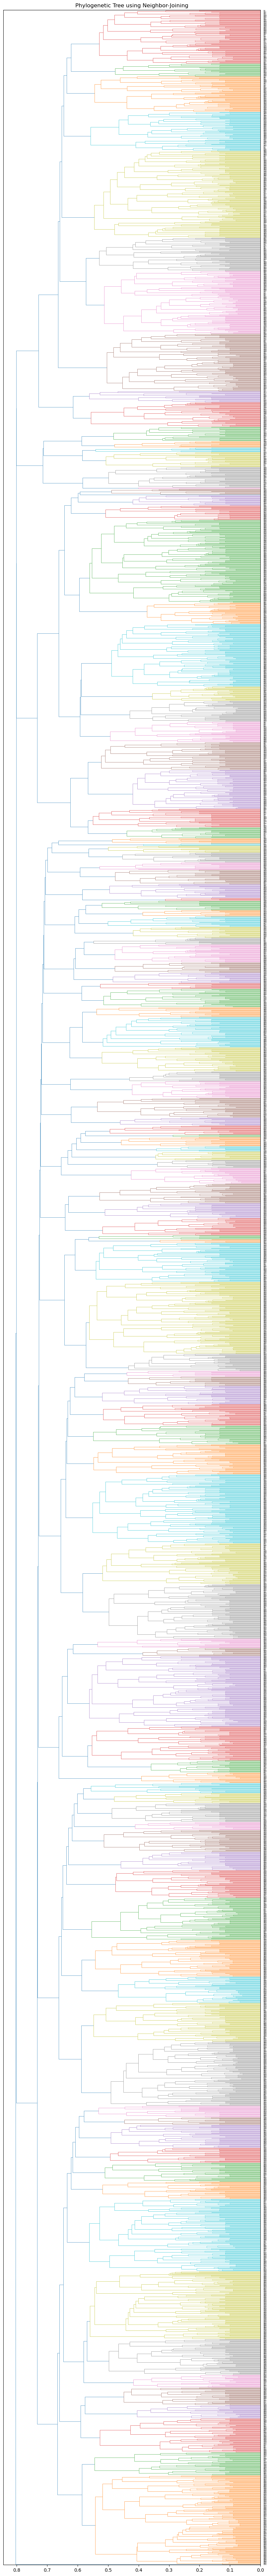

In [40]:
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 0.5
plt.figure(figsize=(10, 100))
pden = dendrogram(Z, labels=df.index, leaf_font_size=2, orientation='left')
plt.title("Phylogenetic Tree using Neighbor-Joining")
plt.savefig("phylo-v3-time.pdf", format="pdf",bbox_inches="tight")
plt.show()